1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import norm

In [88]:
rng=np.random.RandomState(1234)
mu,sigma=0, 0.1
x=rng.normal(mu, sigma, 100)
n_bins=12

<IPython.core.display.Javascript object>


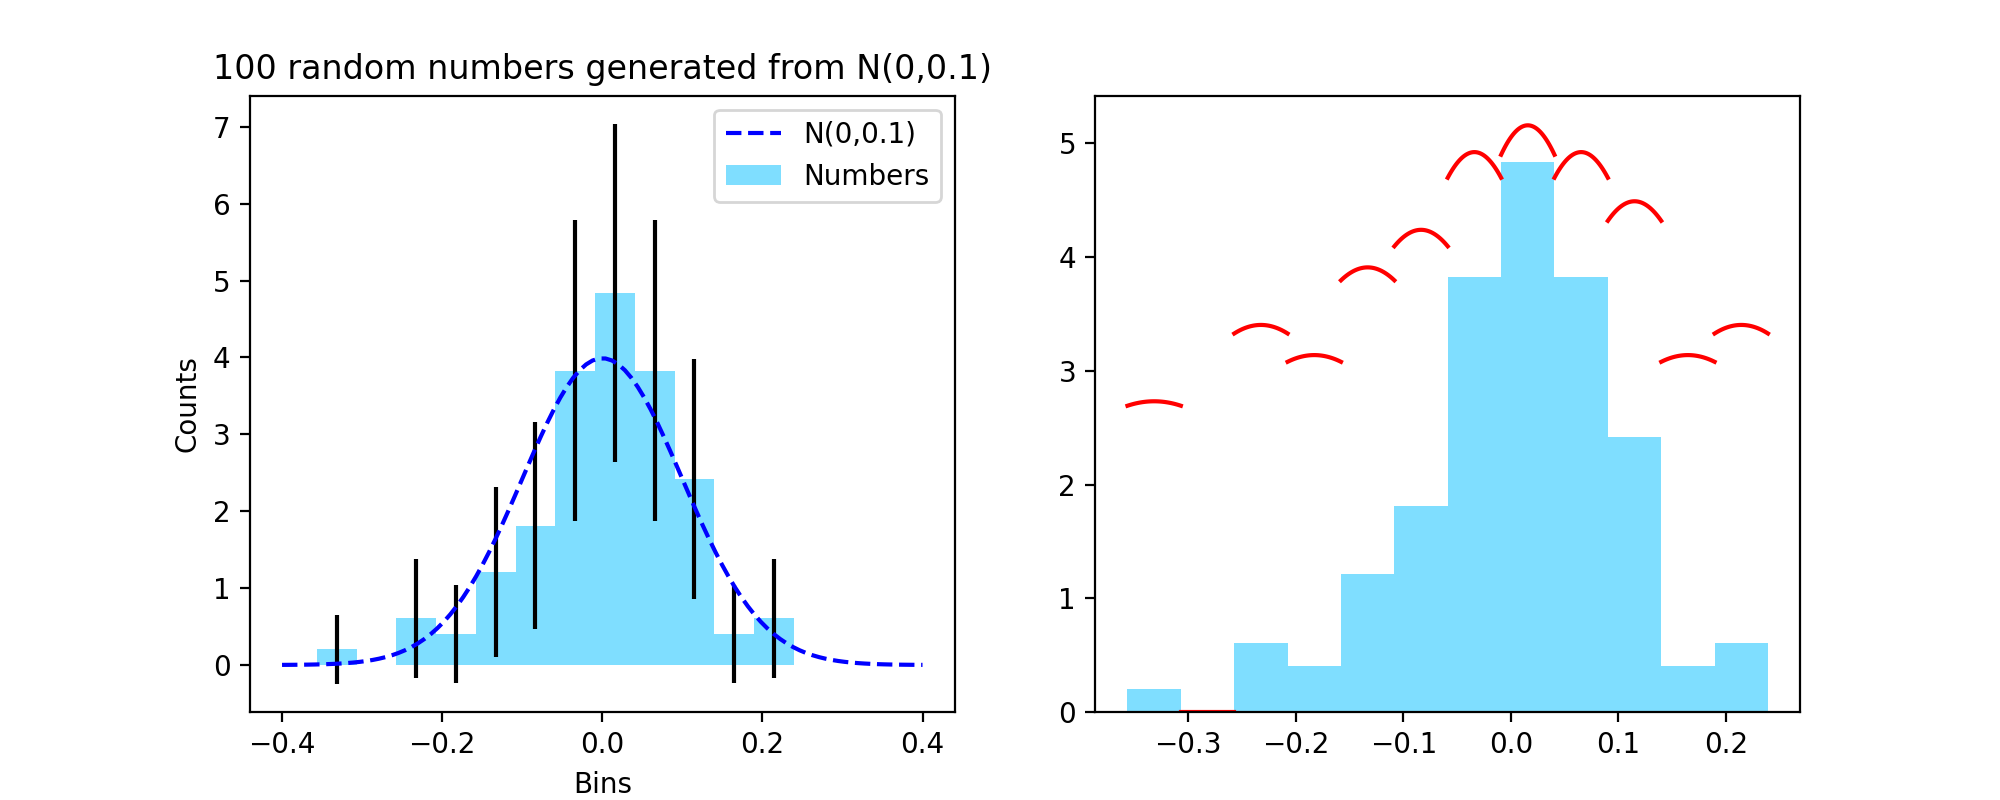

<ipython-input-122-e9da463858b6>:27: RuntimeWarning: divide by zero encountered in power
  tune=1.06*sigma*pow(y,-(1/5))


In [122]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

#left graph

ax[0].hist(x,label='Numbers',bins=n_bins, alpha=0.5, color='deepskyblue',density =True)

#gaussian fit
l=np.linspace(-0.4,0.4,100)
y = norm.pdf(l,loc=0,scale=0.1)
ax[0].plot(l,y, '--',c='b',label='N(0,0.1)')

#errorbars
y,binEdges = np.histogram(x,bins=n_bins, density =True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
yerr = np.sqrt(y)
ax[0].bar(bincenters, y, width=0, yerr=yerr)

#ax[0].
ax[0].legend(loc='best')
ax[0].set_title('100 random numbers generated from N(0,0.1)')
ax[0].set_xlabel('Bins')
ax[0].set_ylabel('Counts')

#right graph

#bin gaussian
tune=1.06*sigma*pow(y,-(1/5))
d=np.linspace(binEdges[1:],binEdges[:-1])
h=norm.pdf(d,loc=bincenters,scale=tune)
ax[1].plot(d,h,c='r')

ax[1].hist(x,label='Numbers',bins=n_bins, alpha=0.5, color='deepskyblue',density =True)



fig.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-12-11 17:44:27--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2021-12-11 17:44:28--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc4d203f6041863ea901b7198ae7.dl.dropboxusercontent.com/cd/0/inline/Bbr76pbY6Otl4M1m8QZi6SuUUqXKR4bFUHFAuyhTG-jbXHD1CfHR1F7Uf8W70Ui7cZ8T7RWWLmUYH3uDtcTh0bhLq6IA-x2rBEyGQ6PHDLC0AfgFT7LdSfBcToDYZT1-Jf2KzRvWatCM8xsnf4roqCIm/file# [segue]
--2021-12-11 17:44:28--  https://uc4d203f6041863ea901b7198ae7.dl.dropboxusercontent.com/cd/0/inline/Bbr76pbY6Otl4M1m8QZi6SuUUqXKR4bFU

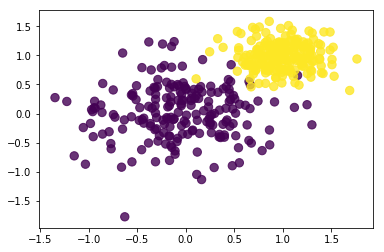

In [70]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

<IPython.core.display.Javascript object>


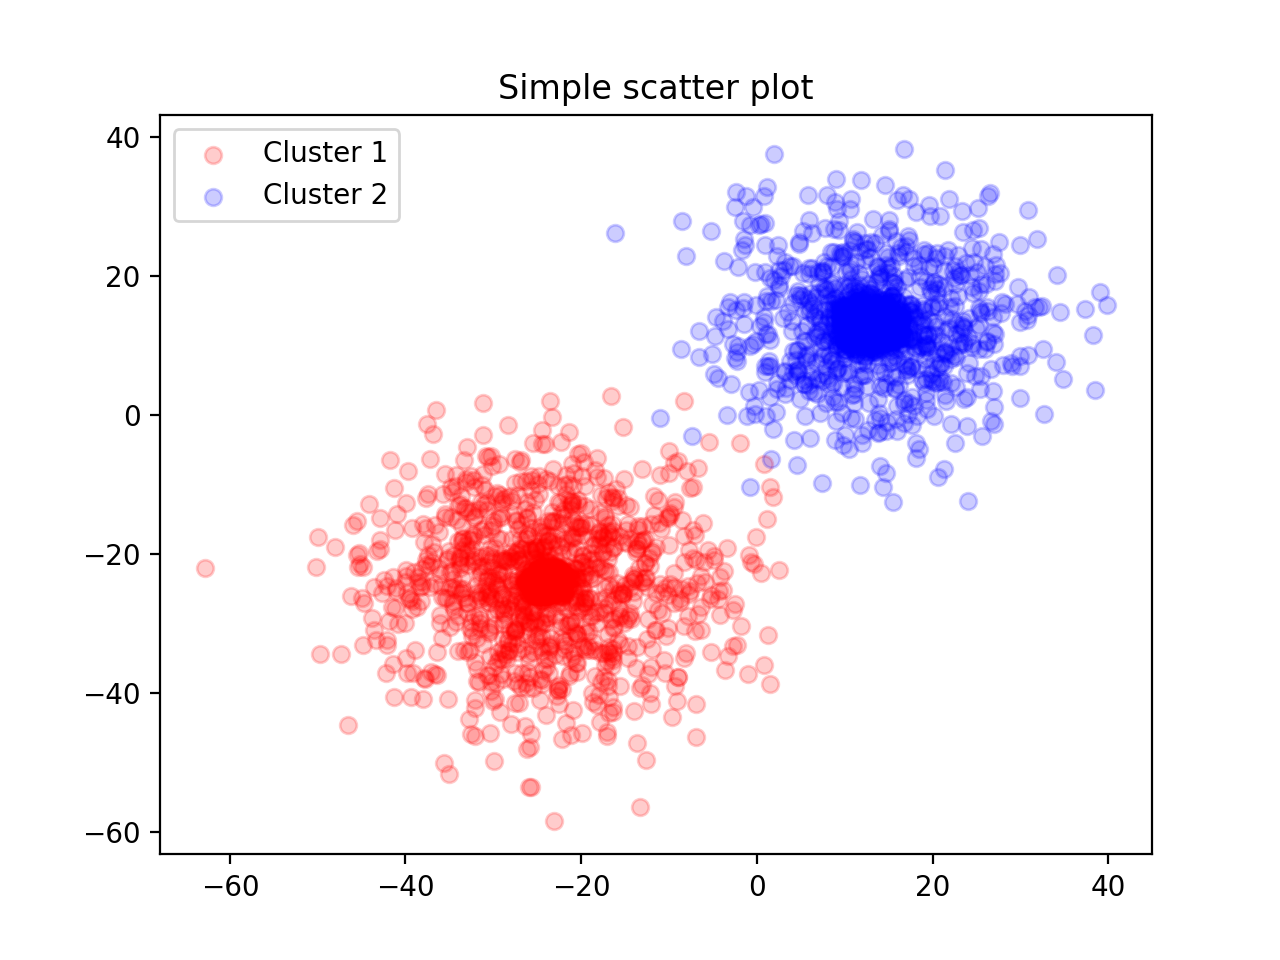

In [44]:
mean1 = [-24, -24]
cov1 = [[1, 0], [0, 100]]

mean2 = [13, 13]
cov2 = [[4, 0], [0, 80]]

x1=rng.multivariate_normal(mean1,cov1,1000)
y1=rng.multivariate_normal(mean1,cov1,1000)

x2=rng.multivariate_normal(mean2,cov2,700)
y2=rng.multivariate_normal(mean2,cov2,700)

%matplotlib notebook
fig=plt.figure()
ax=fig.add_subplot()

ax.scatter(x1, y1, alpha=0.2, c='r',label='Cluster 1')
ax.scatter(x2, y2, alpha=0.2, c='b',label='Cluster 2')

ax.legend(loc='best')
ax.set_title('Simple scatter plot')

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2021-12-12 14:28:56--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2021-12-12 14:28:56--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc5f1fc2608dfdb15a1a059e8769.dl.dropboxusercontent.com/cd/0/inline/Bbu6bYLqOvkgz8syLdeCjhlxuGvosdj_IluH1OxOU5owCFUFFipWXgo4nGespQLR8powQ1HdQOgCZoF9CC3WXB82a6IxzB99EQCIgk6Rmhhwo_pwC0o6nAk8UaM0ee-ub5UXystB5aBLRAmrIFPxRceL/file# [segue]
--2021-12-12 14:28:56--  https://uc5f1fc2608dfdb15a1a059e8769.dl.dropboxusercontent.com/cd/0/inline/Bbu6bYLqOvkgz8syLdeCjhlxuGvosdj_IluH1OxOU5owCFUFFipWXgo4nGespQLR8powQ1HdQOg

In [75]:
a=np.load('residuals_261.npy',allow_pickle=True)
df=pd.DataFrame(data=a.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [106]:
df1=df.loc[df['residuals'].abs()<=2].copy


res = stats.linregress(df1['residuals'], df1['distances'])

TypeError: 'method' object is not subscriptable